# Logistic regression

## Context
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, the attributes in this dataset is a subset of the original dataset. Several columns are simply ignored, and some of the important attritubes like age, account balance etc. are retained.

## Dataset: German Credit Risk

- Age (Numeric : Age in years)
- Sex (Categories : male, female)
- Job (Categories : 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (Categories : own, rent, or free)
- Saving accounts (Categories : little, moderate, quite rich, rich)
- Checking account (Categories : little, moderate, rich)
- Credit amount (Numeric : Amount of credit in DM - Deutsche Mark)
- Duration (Numeric : Duration for which the credit is given in months)
- Purpose (Categories: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
- Risk (0 - Person is not at risk, 1 - Pesron is at risk(defaulter))

# Objective

The objective is to estimate probabilities whether a person would default or not using logistic regression. In this dataset, the target variable is 'Risk'.

# 1. Load Libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
german_credit = pd.read_csv('German_Credit.csv')

# 2. Calculate the percentage of missing values for each column and fill those missing values.


In [2]:
for column in german_credit.select_dtypes(include='object'):
    print(f'{column}: \n{german_credit[column].value_counts()}\n\n')

Sex: 
male      690
female    310
Name: Sex, dtype: int64


Housing: 
own     713
rent    179
free    108
Name: Housing, dtype: int64


Saving accounts: 
little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64


Checking account: 
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


Purpose: 
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64




In [3]:
# check missing values and get other information
german_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [4]:
# find percentage of missing values
missing_value_summary = german_credit.isna().sum()/len(german_credit.isna().any(axis=0))
for value in missing_value_summary.index:
    print(f'{value}: {missing_value_summary[value]} %')

Age: 0.0 %
Sex: 0.0 %
Job: 0.0 %
Housing: 0.0 %
Saving accounts: 18.3 %
Checking account: 39.4 %
Credit amount: 0.0 %
Duration: 0.0 %
Purpose: 0.0 %
Risk: 0.0 %


In [5]:
# fill missing values
german_credit_rectified = german_credit.fillna(value='unknown')
#verify
missing_value_summary_rectified = german_credit_rectified.isna().sum()/len(german_credit_rectified.isna().any(axis=0))
for value in missing_value_summary_rectified.index:
    print(f'{value}: {missing_value_summary_rectified[value]} %')

Age: 0.0 %
Sex: 0.0 %
Job: 0.0 %
Housing: 0.0 %
Saving accounts: 0.0 %
Checking account: 0.0 %
Credit amount: 0.0 %
Duration: 0.0 %
Purpose: 0.0 %
Risk: 0.0 %


# 3. Plot histogram for columns 'Credit amount' and 'Age'

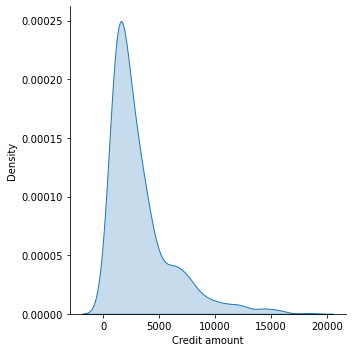

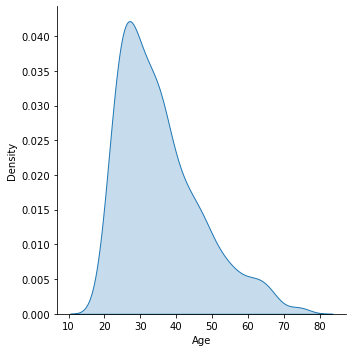

In [6]:
sns.displot(german_credit_rectified, x="Credit amount", kind="kde", fill=True)
sns.displot(german_credit_rectified, x="Age", kind="kde", fill=True)

# 4. Create counplots for columns 'Duration', 'Purpose'. What durations are most common and for what purposes most credits are taken?

<AxesSubplot:xlabel='Duration', ylabel='count'>

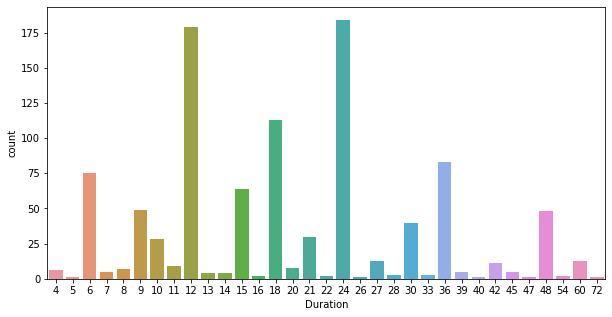

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x="Duration", data=german_credit_rectified)

<AxesSubplot:xlabel='Purpose', ylabel='count'>

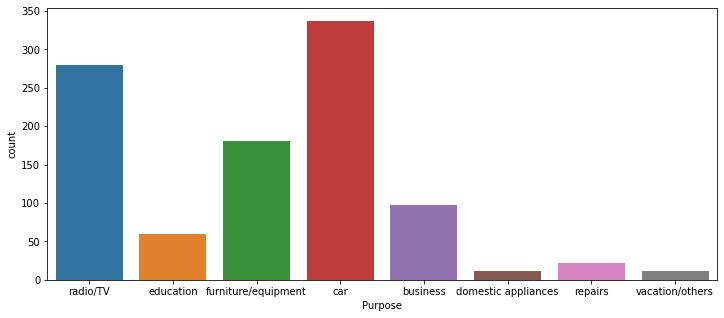

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(x="Purpose", data=german_credit_rectified)

## Insights
* Most common duration is 2 years (24 months) followed by 1 year (12 months)
* Most common purpose of credit is Car followed by radio/tv

# 5. Which 'Job', 'Savings account', 'Checking account' has highest number of defaulters?

<AxesSubplot:xlabel='Sex', ylabel='count'>

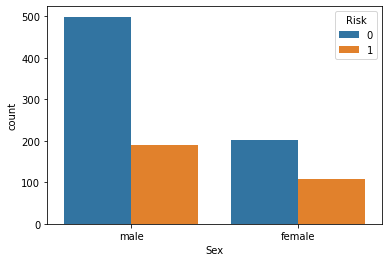

In [9]:
sns.countplot(x="Sex", hue = 'Risk', data=german_credit_rectified)

In [10]:
sex_risk = german_credit_rectified[['Sex', 'Risk']]
sex_risk_summary = sex_risk.groupby(['Sex']).sum()
sex_risk_summary['Total'] = sex_risk.groupby(['Sex']).count()
sex_risk_summary['Percentage'] = sex_risk_summary['Risk']/sex_risk_summary['Total'] * 100
sex_risk_summary
sex_risk_summary.reset_index(inplace=True)

<AxesSubplot:xlabel='Sex', ylabel='Percentage'>

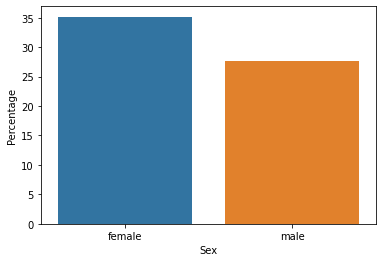

In [11]:
sns.barplot(x='Sex', y='Percentage', data = sex_risk_summary)

In [12]:
german_credit_rectified['Job'] = german_credit_rectified['Job'].replace({0:'unskilled and non-resident', 1:'unskilled and resident', 2:'skilled', 3:'highly skilled'})

<AxesSubplot:xlabel='Job', ylabel='count'>

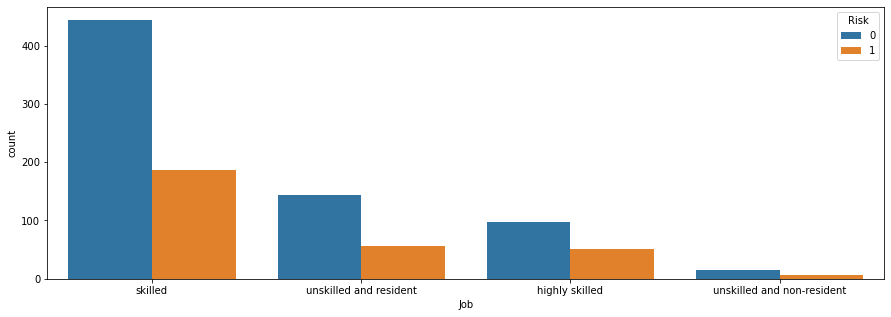

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(x="Job", hue = 'Risk', data=german_credit_rectified)

<AxesSubplot:xlabel='Job', ylabel='Percentage'>

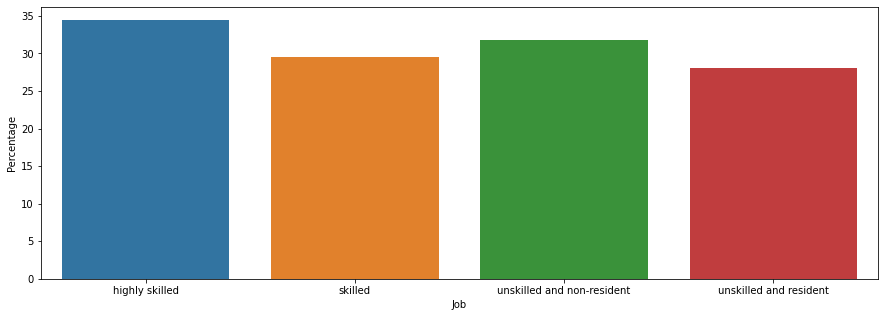

In [14]:
plt.figure(figsize=(15,5))
job_risk = german_credit_rectified[['Job', 'Risk']]
job_risk_summary = job_risk.groupby('Job').sum()
job_risk_summary['Total'] = job_risk.groupby('Job').count()
job_risk_summary['Percentage'] = job_risk_summary['Risk']/job_risk_summary['Total'] * 100
job_risk_summary.reset_index(inplace=True)
sns.barplot(x='Job', y='Percentage', data=job_risk_summary)

<AxesSubplot:ylabel='Percentage'>

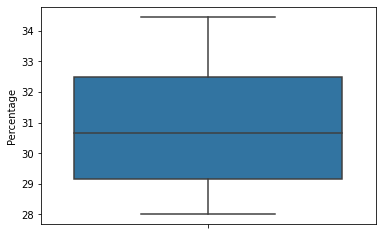

In [15]:
sns.boxplot(y='Percentage', data=job_risk_summary)

<AxesSubplot:xlabel='Saving accounts', ylabel='count'>

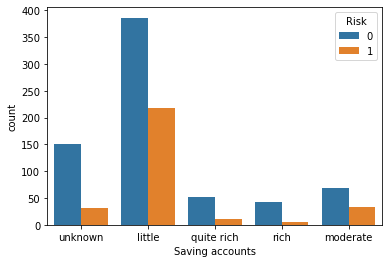

In [16]:
sns.countplot(x='Saving accounts', hue='Risk', data = german_credit_rectified)

<AxesSubplot:xlabel='Saving accounts', ylabel='Percentage'>

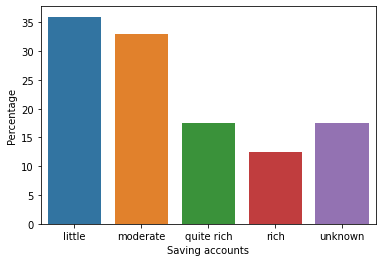

In [17]:
saving_account_risk = german_credit_rectified[['Saving accounts', 'Risk']]
saving_account_risk_summary = saving_account_risk.groupby('Saving accounts').sum()
saving_account_risk_summary['Total'] = saving_account_risk.groupby('Saving accounts').count()
saving_account_risk_summary['Percentage'] = saving_account_risk_summary['Risk']/saving_account_risk_summary['Total']*100
saving_account_risk_summary.reset_index(inplace=True)
sns.barplot(data=saving_account_risk_summary, x='Saving accounts', y='Percentage')

<AxesSubplot:ylabel='Percentage'>

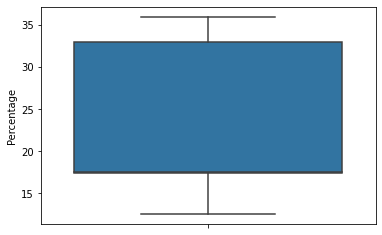

In [18]:
sns.boxplot(y='Percentage', data=saving_account_risk_summary)

<AxesSubplot:xlabel='Checking account', ylabel='count'>

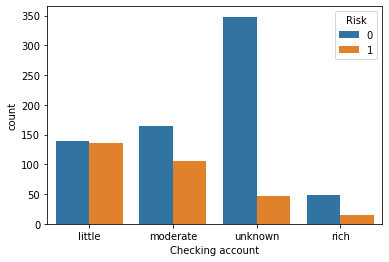

In [19]:
sns.countplot(x='Checking account', hue='Risk', data = german_credit_rectified)

<AxesSubplot:xlabel='Checking account', ylabel='Percentage'>

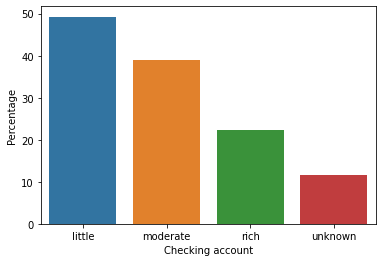

In [20]:
checking_account_risk = german_credit_rectified[['Checking account','Risk']]
checking_account_risk_summary = checking_account_risk.groupby('Checking account').sum()
checking_account_risk_summary['Total'] = checking_account_risk.groupby('Checking account').count()
checking_account_risk_summary['Percentage'] = checking_account_risk_summary['Risk']/checking_account_risk_summary['Total'] * 100
checking_account_risk_summary.reset_index(inplace=True)
sns.barplot(x='Checking account', y='Percentage',data=checking_account_risk_summary)

## Insights
* Although the number of male defaulters is higher than female defaulters, the ratio of defaulters vs non defaulters is higher in females
* The highest number of defaulters are skilled workers followed by ```unskilled and residents``` category of workers. In terms of ratio all kind of jobs are almost equally likely to default with default percentages ranging between 28 to ~35 % across all job types
* In terms of savings - people with little savings are the largest number of defaulters - they are also most likely to default (defaulter vs non defaulter ratio) - also people with moderate savings are also quite risky in terms of defaulting (although they are the third largest in terms of number)
* In terms of checking account - people with unknown status of checking account balance are the largest number of defaulters - but they are not the most likely group to default (defaulter vs non defaulter ratio) - people with little balance in their checking account are most likely to default followed by people with moderate savings although they have the second highest number of defaulters

# 6. Convert 'Credit amount' and 'Age' into categorical features by grouping them into different intervals and drop the original columns.
You can decide the intervals using df.describe() method.

In [21]:
german_credit_rectified.describe()

,Age,Credit amount,Duration,Risk
count,"1,000.00","1,000.00","1,000.00","1,000.00"
mean,35.55,"3,271.26",20.90,0.30
std,11.38,"2,822.74",12.06,0.46
min,19.00,250.00,4.00,0.00
25%,27.00,"1,365.50",12.00,0.00
50%,33.00,"2,319.50",18.00,0.00
75%,42.00,"3,972.25",24.00,1.00
max,75.00,"18,424.00",72.00,1.00


In [22]:
def credit_classifier(row):
    credit_amount = row['Credit amount']
    if credit_amount <= 1365.50:
        return 'low'
    elif credit_amount > 1365.50 and credit_amount <= 2319.50:
        return 'medium'
    elif credit_amount > 2319.50 and credit_amount <= 3972.25:
        return 'high'
    elif credit_amount > 3972.25:
        return 'very-high'
german_credit_rectified['Credit category'] = german_credit_rectified.apply(credit_classifier, axis=1)
german_credit_rectified['Credit category']
german_credit_rectified.drop(['Credit amount'], axis=1, inplace=True)

In [24]:
age_bins = [18, 27, 33, 42, 76]
age_cats = ['18-26', '27-32', '33-41', '42-75']
german_credit_rectified['Age category'] = pd.cut(german_credit_rectified.Age, age_bins, labels=age_cats)
german_credit_rectified.drop(['Age'], axis=1, inplace=True)
german_credit_rectified.head()

,Sex,Job,Housing,Saving accounts,Checking account,Duration,Purpose,Risk,Credit category,Age category
0,male,skilled,own,unknown,little,6,radio/TV,0,low,42-75
1,female,skilled,own,little,moderate,48,radio/TV,1,very-high,18-26
2,male,unskilled and resident,own,little,unknown,12,education,0,medium,42-75
3,male,skilled,free,little,little,42,furniture/equipment,0,very-high,42-75
4,male,skilled,free,little,little,24,car,1,very-high,42-75


# 7. Find out total number of defaulters where for each category of 'Age' and  'Credit amount'.

In [38]:
age_defaulter = german_credit_rectified[['Age category', 'Risk']].groupby('Age category').sum()
age_defaulter['Total'] = german_credit_rectified[['Age category', 'Risk']].groupby('Age category').count()
age_defaulter['Percentage'] = age_defaulter['Risk']/age_defaulter['Total']*100
age_defaulter
age_defaulter.reset_index(inplace=True)

<AxesSubplot:xlabel='Age category', ylabel='Risk'>

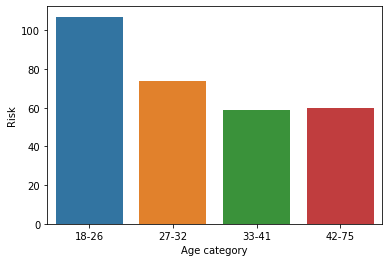

In [42]:
sns.barplot(data=age_defaulter, x="Age category", y='Risk')

<AxesSubplot:xlabel='Age category', ylabel='Percentage'>

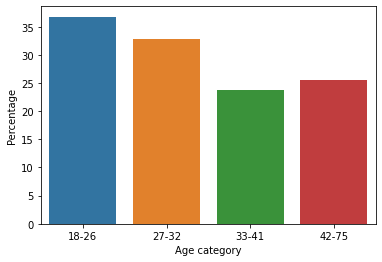

In [33]:
sns.barplot(data=age_defaulter, x="Age category", y='Percentage')

In [40]:
credit_category_defaulter = german_credit_rectified[['Credit category', 'Risk']].groupby('Credit category').sum()
credit_category_defaulter['Total'] = german_credit_rectified[['Credit category', 'Risk']].groupby('Credit category').count()
credit_category_defaulter['Percentage'] = credit_category_defaulter['Risk']/credit_category_defaulter['Total']*100
credit_category_defaulter.reset_index(inplace=True)

<AxesSubplot:xlabel='Credit category', ylabel='Risk'>

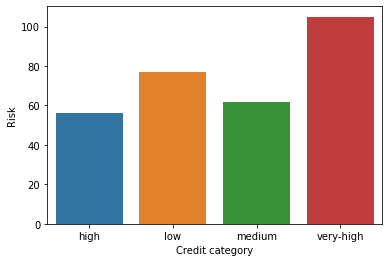

In [43]:
sns.barplot(data=credit_category_defaulter, x="Credit category", y='Risk')

<AxesSubplot:xlabel='Credit category', ylabel='Percentage'>

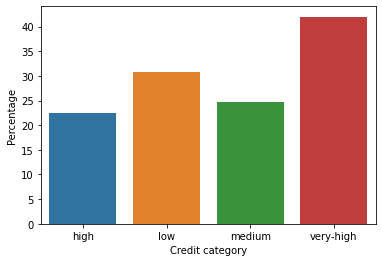

In [37]:
sns.barplot(data=credit_category_defaulter, x="Credit category", y='Percentage')

## Insights
* Lower age group (18-26) has the highest number of defaulters and also has the highest risk of defaulting.
* The highest number of defaulters are in ```very-high``` credit category - this is also the category with highest probability of default.

In [61]:
crosstab=pd.crosstab(german_credit_rectified['Job'],german_credit_rectified['Risk'])
crosstab.reset_index(inplace=True)
#
crosstab.rename(columns={0: 'No', 1: 'Yes'}, inplace=True)
crosstab['Total'] = crosstab['No']+crosstab['Yes']
crosstab['Percentage default'] = crosstab['Yes']/crosstab['Total'] * 100
crosstab

Risk,Job,No,Yes,Total,Percentage default
0,highly skilled,97,51,148,34.46
1,skilled,444,186,630,29.52
2,unskilled and non-resident,15,7,22,31.82
3,unskilled and resident,144,56,200,28.00


# 8. Prepare input data for the model

### Separate dependent and independent variables

### One hot enocding for all the categorical variables

### Split data into train and test (maintain the ratio of both classes in train and test set same as the original dataset)

# 9. Predict Target Variable for Test Data using Sklearn

# 10. Try calculating Probabilities of Target using Sklearn

# 11. Build a confusion matrix and display the same using heatmap plot

# 12.  Make a predicted probability distribution plot for defaulters and non defaulters

# 13. Give your conclusion for the problem. Which evaluation metric would you choose? 